RFC Trained Classifier Confidence: 0.9668
Predicted Values: [3 6 8 ... 3 7 0]
Accuracy of Classifier on Validation Image Data: 0.9668
Confusion Matrix:
[[1008    0    4    0    1    0    1    2    6    0]
 [   0 1119    7    6    2    1    0    3    0    0]
 [   7    2 1048    3    1    0    8    8    5    2]
 [   2    0   14  995    1   10    0    9    8    7]
 [   2    1    2    1  935    0    2    3    0   17]
 [   2    2    0    9    3  918    5    3    7    4]
 [   3    2    0    1    4    3 1070    0    2    0]
 [   3    4   12    2    6    1    0 1114    4   16]
 [   1    4    6   10    3    8    3    3  950   11]
 [   8    6    1   13   11    2    1    8    4  994]]
Predicted Labels for Test Images: [4 4 7 ... 4 3 2]
Accuracy of Classifier on Test Images: 0.9668
Confusion Matrix for Test Data:
[[1018    0    2    0    1    1    4    1    8    1]
 [   0 1210    5    4    1    1    0    4    1    0]
 [   2    5 1014    4    7    0    2    7    7    1]
 [   1    0   18 1069    1  

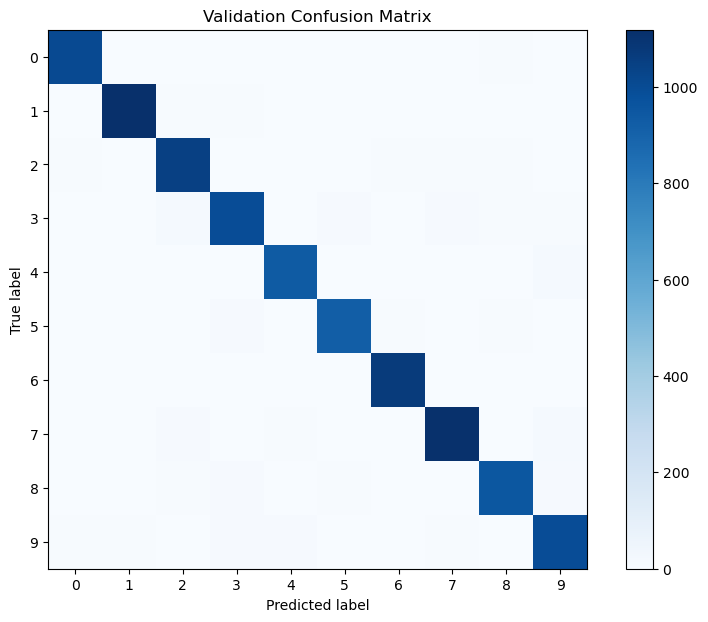

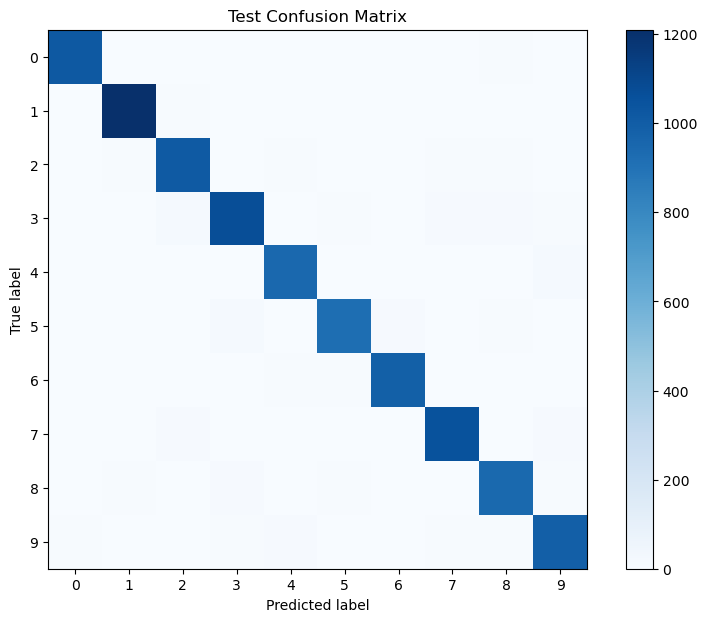

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Load MNIST data with updated parser parameter
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target.astype(np.int8)

# Convert arrays to contiguous arrays
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert split arrays to contiguous arrays
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_val = np.ascontiguousarray(X_val)
y_val = np.ascontiguousarray(y_val)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=10, random_state=42)
rfc.fit(X_train, y_train)

# Pickle the classifier for future use
joblib.dump(rfc, 'rfc_classifier.pkl')

# Calculate accuracy on validation data
y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

print(f"RFC Trained Classifier Confidence: {val_accuracy:.4f}")
print(f"Predicted Values: {y_val_pred}")
print(f"Accuracy of Classifier on Validation Image Data: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

# Calculate accuracy on test data
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Predicted Labels for Test Images: {y_test_pred}")
print(f"Accuracy of Classifier on Test Images: {test_accuracy:.4f}")
print("Confusion Matrix for Test Data:")
print(test_confusion_matrix)

# Optional: Visualizing the confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(val_confusion_matrix, 'Validation Confusion Matrix')
plot_confusion_matrix(test_confusion_matrix, 'Test Confusion Matrix')
